In [8]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.environ['CONFIG_DIR'] = "/content/gdrive/My Drive/Project"
%cd /content/gdrive/My Drive/Project
%ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Project
kitti/  output/  readme.txt


In [9]:
import cv2
import numpy as np
#import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join
import pandas as pd

#import gc; gc.enable() # memory is tight

#from keras import layers, models
#from keras import backend as K
#from keras.optimizers import Adam




In [10]:

test_image_dir = 'kitti/testing/image_2/'
images =  [(test_image_dir+f) for f in listdir(test_image_dir) if isfile(join(test_image_dir, f))]
df = pd.DataFrame(images)

In [11]:
df



0
0     kitti/testing/image_2/006528.png
1     kitti/testing/image_2/006510.png
2     kitti/testing/image_2/006514.png
3     kitti/testing/image_2/006525.png
4     kitti/testing/image_2/006524.png
...                                ...
7513  kitti/testing/image_2/000514.png
7514  kitti/testing/image_2/000508.png
7515  kitti/testing/image_2/000521.png
7516  kitti/testing/image_2/000519.png
7517  kitti/testing/image_2/000503.png

[7518 rows x 1 columns]

In [12]:
df_test = df
resized_shape = (160, 256)  

In [13]:
BATCH_SIZE = 64
'''make batchs of images
'''
def create_images_generator(df_in, batch_size, resized_shape):
    batch_image = []
    df_in_list = (df_in).values.tolist()
#     print(len(df_in_list))
    np.random.shuffle(df_in_list)
    # return df_in_list    
    
    while True:
#         np.random.shuffle(df_in_list)
        for image_path in df_in_list:
            image_r = cv2.imread(image_path[0])         
            image_r = cv2.resize(image_r,(resized_shape[1], resized_shape[0]))                  
            batch_image.append(image_r)
            
            if len(batch_image)>=batch_size:
                yield np.float32(np.stack((batch_image), 0)/255.0)
                batch_image= []



In [14]:
test_gen = create_images_generator(df_test, batch_size=BATCH_SIZE, resized_shape=resized_shape)
#print(df_in_list)
test_img = next(test_gen)  



In [15]:
# load json and create model
json_file = open('output/model/model_car.json', 'r',encoding='utf-8-sig')
loaded_model_json = json_file.read()
json_file.close()
from keras.models import model_from_json
model_car = model_from_json(loaded_model_json)

# load weights into new model
model_car.load_weights("output/model/model_car.h5")
print("Loaded model from disk")

Loaded model from disk


In [16]:
# load json and create model
json_file = open('output/model/model_pedestrian.json', 'r',encoding='utf-8-sig')
loaded_model_json = json_file.read()
json_file.close()
from keras.models import model_from_json
model_pedestrian = model_from_json(loaded_model_json)

# load weights into new model
model_pedestrian.load_weights("output/model/model_pedestrian.h5")
print("Loaded model from disk")

Loaded model from disk


In [17]:
pred_all_car= model_car.predict(test_img)
np.shape(pred_all_car)
pred_all_pedestrian= model_pedestrian.predict(test_img)
np.shape(pred_all_pedestrian)


(64, 160, 256, 1)

Input:  0


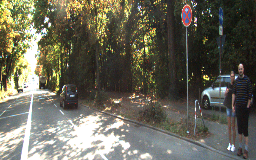

Prediction


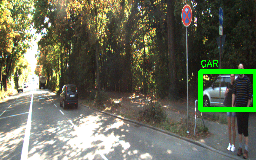



Input:  1


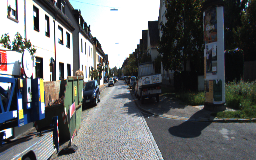

Prediction


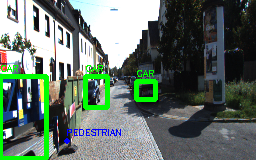



Input:  2


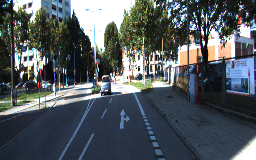

Prediction


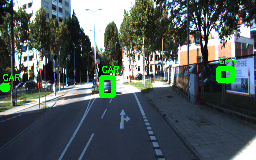



Input:  3


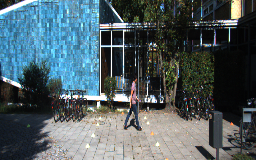

Prediction


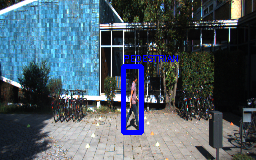



Input:  4


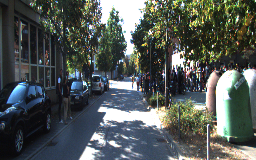

Prediction


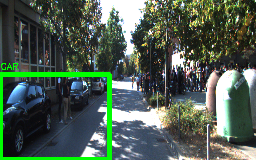



Input:  5


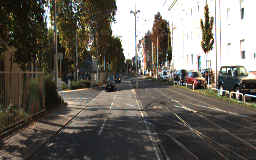

Prediction


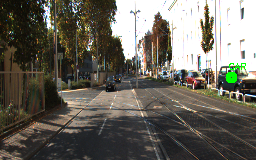



Input:  6


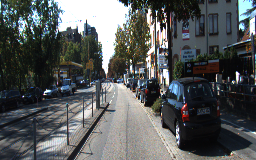

Prediction


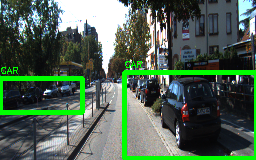



Input:  7


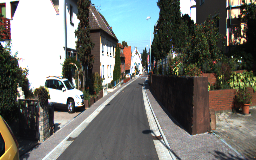

Prediction


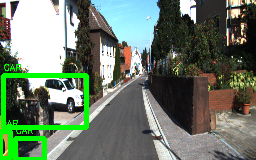



Input:  8


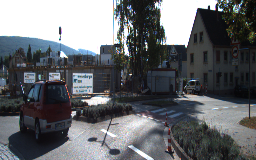

Prediction


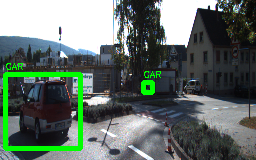



Input:  9


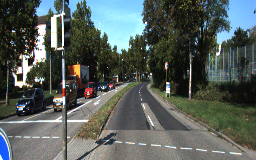

Prediction


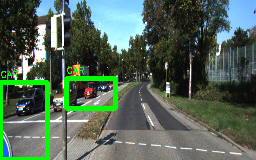



Input:  10


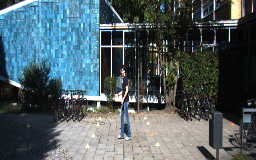

Prediction


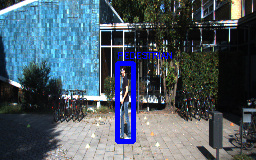



Input:  11


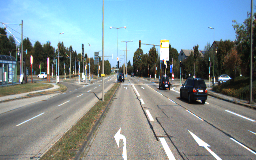

Prediction


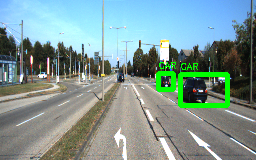



Input:  12


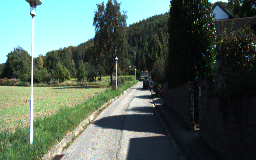

Prediction


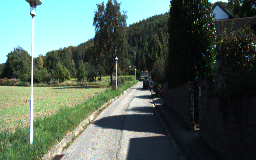



Input:  13


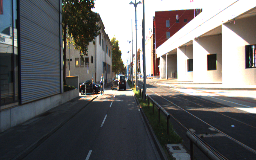

Prediction


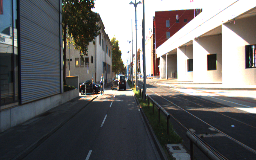



Input:  14


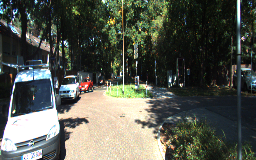

Prediction


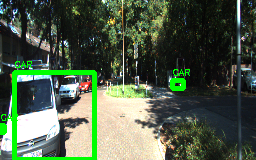



Input:  15


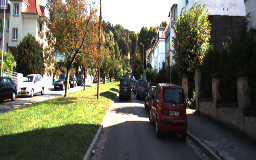

Prediction


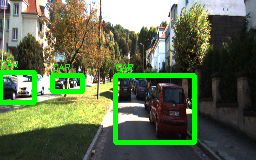



Input:  16


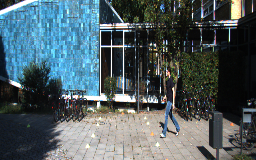

Prediction


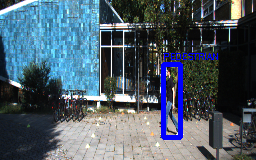



Input:  17


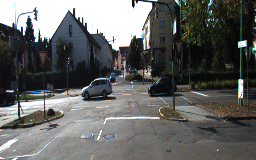

Prediction


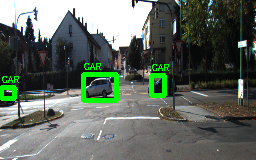



Input:  18


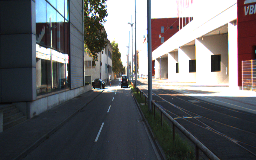

Prediction


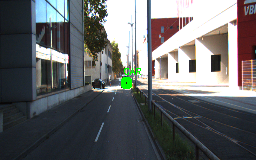



Input:  19


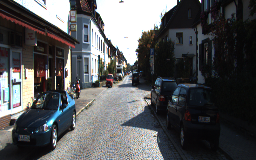

Prediction


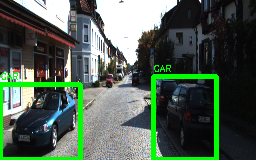

In [18]:
from google.colab.patches import cv2_imshow

pred_all_car= model_car.predict(test_img)
np.shape(pred_all_car)

pred_all_pedestrian= model_pedestrian.predict(test_img)
np.shape(pred_all_pedestrian)


for i in range(20):
    print("Input: ",i)
    im = np.array(255*test_img[i],dtype=np.uint8)
    cv2_imshow(im)

    im_pred = np.array(255*pred_all_car[i],dtype=np.uint8)
    #rgb_mask_box = cv2.cvtColor(rgb_mask_pred, cv2.COLOR_BGR2GRAY);

    rgb_mask_box= im_pred
    #cv2_imshow(rgb_mask_box)
    ret,thresh = cv2.threshold(rgb_mask_box,127,255,0)
    img2 = im
    contours,hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(rgb_mask_box, contours, -1, (0,255,0), 3)
    #print(contours)

    for c in contours:
        rect = cv2.boundingRect(c)
        #if rect[2] < 100 or rect[3] < 100: continue
        #print(cv2.contourArea(c))
        x,y,w,h = rect
        cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),3)
        cv2.putText(img2,'CAR',(x,y-5),0,0.3,(0,255,0))
    




    im_pred = np.array(255*pred_all_pedestrian[i],dtype=np.uint8)
    #rgb_mask_box = cv2.cvtColor(rgb_mask_pred, cv2.COLOR_BGR2GRAY);

    rgb_mask_box= im_pred
    #cv2_imshow(rgb_mask_box)
    ret,thresh = cv2.threshold(rgb_mask_box,127,255,0)
    img3 = img2
    contours,hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(rgb_mask_box, contours, -1, (0,255,0), 3)
    #print(contours)

    for c in contours:
        rect = cv2.boundingRect(c)
        #if rect[2] < 100 or rect[3] < 100: continue
        #print(cv2.contourArea(c))
        x,y,w,h = rect
        cv2.rectangle(img3,(x,y),(x+w,y+h),(255,0,0),3)
        cv2.putText(img3,'PEDESTRIAN',(x,y-5),0,0.3,(255,0,0))
    
    

    print("Prediction")
    cv2_imshow(img3)
    print("\n")